# Bivariate Gaussian
------------------
## Figure 3.22.



In [12]:
"""
Bivariate Gaussian
------------------
Figure 3.22.

An example of data generated from a bivariate Gaussian distribution. The
shaded pixels are a Hess diagram showing the density of points at each
position.
"""



'\nBivariate Gaussian\n------------------\nFigure 3.22.\n\nAn example of data generated from a bivariate Gaussian distribution. The\nshaded pixels are a Hess diagram showing the density of points at each\nposition.\n'

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal


In [14]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [15]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [16]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [17]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Define the mean, principal axes, and rotation of the ellipse

In [18]:
#------------------------------------------------------------
# Define the mean, principal axes, and rotation of the ellipse
mean = np.array([0, 0])
sigma_1 = 2
sigma_2 = 1
alpha = np.pi / 4



# Draw 10^5 points from a multivariate normal distribution

we use the bivariate_normal function from astroML.  A more
general function for this is numpy.random.multivariate_normal(),
which requires the user to specify the full covariance matrix.
bivariate_normal() generates this covariance matrix for the
given inputs.


In [19]:
#------------------------------------------------------------
# Draw 10^5 points from a multivariate normal distribution
#
#   we use the bivariate_normal function from astroML.  A more
#   general function for this is numpy.random.multivariate_normal(),
#   which requires the user to specify the full covariance matrix.
#   bivariate_normal() generates this covariance matrix for the
#   given inputs.
np.random.seed(0)
x, cov = bivariate_normal(mean, sigma_1, sigma_2, alpha, size=100000,return_cov=True)

sigma_x = np.sqrt(cov[0, 0])
sigma_y = np.sqrt(cov[1, 1])
sigma_xy = cov[0, 1]


In [24]:
print("sigma_x",sigma_x)
print("sigma_y",sigma_y)
print("sigma_xy",sigma_xy)

sigma_x 1.5811388300841898
sigma_y 1.5811388300841895
sigma_xy 1.5


# Plot the results

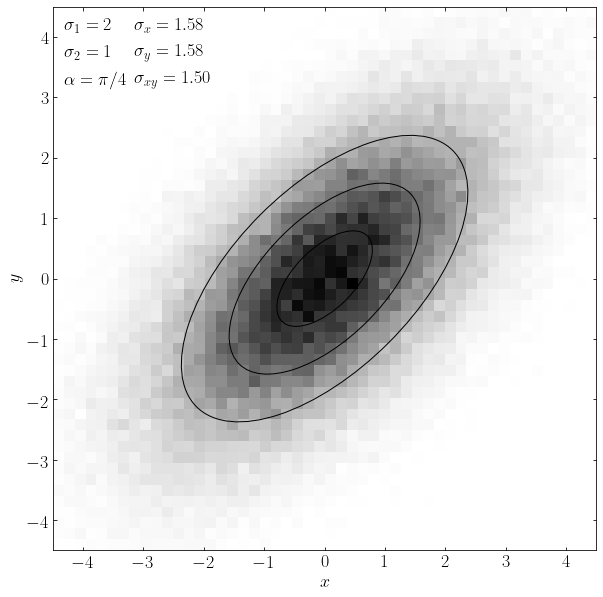

In [21]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# plot a 2D histogram/hess diagram of the points
H, bins = np.histogramdd(x, bins=2 * [np.linspace(-4.5, 4.5, 51)])
ax.imshow(H, origin='lower', cmap=plt.cm.binary, interpolation='nearest',
          extent=[bins[0][0], bins[0][-1], bins[1][0], bins[1][-1]])

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean, N * sigma_1, N * sigma_2,
                         angle=alpha * 180. / np.pi, lw=1,
                         ec='k', fc='none'))

kwargs = dict(ha='left', va='top', transform=ax.transAxes)

ax.text(0.02, 0.98, r"$\sigma_1 = %i$" % sigma_1, **kwargs)
ax.text(0.02, 0.93, r"$\sigma_2 = %i$" % sigma_2, **kwargs)
ax.text(0.02, 0.88, r"$\alpha = \pi / %i$" % (np.pi / alpha), **kwargs)

ax.text(0.15, 0.98, r"$\sigma_x = %.2f$" % sigma_x, **kwargs)
ax.text(0.15, 0.93, r"$\sigma_y = %.2f$" % sigma_y, **kwargs)
ax.text(0.15, 0.88, r"$\sigma_{xy} = %.2f$" % sigma_xy, **kwargs)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()
